<a href="https://colab.research.google.com/github/Favisoki/hdsc-2021/blob/main/HDSC21_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('Done')

Done


In [43]:
energy_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv', parse_dates=True)
# print the first five rows
energy_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [44]:
# descriptive statistic of the data
energy_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [45]:
# grab a sample of size 50
energy_sample = energy_df.sample(n=50, random_state=1)

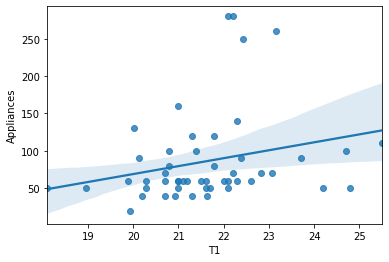

In [46]:
sns.regplot(x='T1', y='Appliances', data=energy_sample)

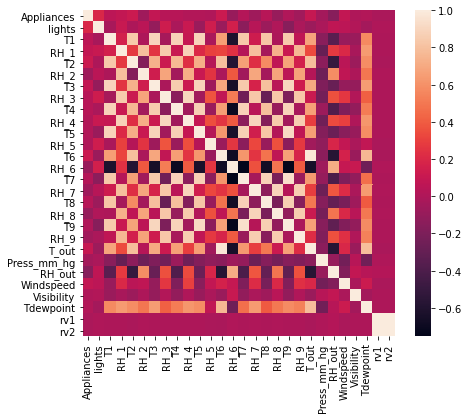

In [47]:
# plot the correlation matrix of the data
plt.figure(figsize=(7,6))
correl = energy_df.corr()
sns.heatmap(correl)

In [48]:
#Firstly the dataset is normalised to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
# drop irrelevant columns
new_energy_df = energy_df.drop(columns=['date', 'lights'])

# create a new dataframe for the normalized data
norm_energy_df = pd.DataFrame(scaler.fit_transform(new_energy_df), columns=new_energy_df.columns)

# copy out the features by dropping the labels
energy_features = norm_energy_df.drop(columns=['Appliances'])

# grab the label
label = norm_energy_df['Appliances']

energy_features.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


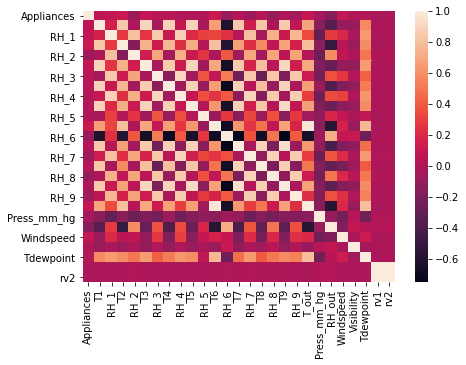

In [49]:
# correlation heatmap for the normalised data
plt.figure(figsize=(7,5))
correlation = norm_energy_df.corr()
sns.heatmap(correlation)

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

R_reg = Ridge(alpha=0.4)
R_reg.fit(x_train, y_train)

predictions = R_reg.predict(x_test)

# find the metric and store ina avariable
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('The Root Mean Squared Error of our Ridge Model: ', round(rmse, 3))

The Root Mean Squared Error of our model:  0.088


In [65]:
norm_energy_df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [84]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

feat = norm_energy_df[['T2']]
y = norm_energy_df['T6']

from sklearn.model_selection import train_test_split
 
# do the magic of splitting the data into train and test
bx_train, bx_test, by_train, by_test = train_test_split(feat, y, test_size=0.3, random_state=42)

#fit the model to the "training" data
linear_model.fit(bx_train, by_train)

#make predictions
predicted_values = linear_model.predict(bx_test)

#lets see what we predicted
print('-------' * 20)
print('Our first 20 predictions: \n', predicted_values[:20])

--------------------------------------------------------------------------------------------------------------------------------------------
Our first 20 predictions: 
 [0.23928945 0.46794238 0.23108472 0.63635531 0.1552989  0.4420327
 0.1829359  0.42324818 0.35199656 0.23734623 0.50032948 0.44915786
 0.35199656 0.3649514  0.45995356 0.29154064 0.3649514  0.24123268
 0.3325643  0.4297256 ]


In [85]:
# the r2 score
# first import the metric 
from sklearn.metrics import r2_score

# then find the metric and store ina avariable
r2_score = r2_score(by_test, predicted_values)
print('R2_Score of the model: ', round(r2_score,2))

R2_Score of the model:  0.64


In [82]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

#find the metric and store ina avariable
mae = mean_absolute_error(by_test, predicted_values)

print('Mean Absolute Error of our Linear model: ', round(mae, 2))

Mean Absolute Error of our Linear model:  0.08


In [83]:
# the residual sum of squares value
rss_1 = np.sum(np.square(by_test - predicted_values))

print('Residual sum of squares of the model: ', round(rss_1, 2))

Residual sum of squares of the model:  66.12


In [87]:
# the root mean squared error
from sklearn.metrics import mean_squared_error

# find the metric and store ina avariable
rmse_1 = np.sqrt(mean_squared_error(by_test, predicted_values))
print('The Root Mean Squared Error of our model: ', round(rmse_1, 2))

The Root Mean Squared Error of our model:  0.11


In [89]:
from sklearn.linear_model import Ridge
R_reg = Ridge(alpha=0.5)
R_reg.fit(bx_train, by_train)
preds = R_reg.predict(bx_test)

# the root mean squared error
from sklearn.metrics import mean_squared_error

# find the metric and store ina avariable
rmse_2 = np.sqrt(mean_squared_error(by_test, preds))
print('The Root Mean Squared Error of our model: ', round(rmse_2, 2))

The Root Mean Squared Error of our model:  0.11


In [92]:
from sklearn.model_selection import train_test_split
 
# do the magic of splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(energy_features, label, test_size=0.4, random_state=1)

from sklearn.linear_model import Lasso
L_reg = Lasso(alpha=0.001)
L_reg.fit(x_train, y_train)

predicted = L_reg.predict(x_test)

#lets see what we predicted
print('-------' * 20)
print('Our first 20 predictions: \n', predicted_values[:20])

--------------------------------------------------------------------------------------------------------------------------------------------
Our first 20 predictions: 
 [0.23928945 0.46794238 0.23108472 0.63635531 0.1552989  0.4420327
 0.1829359  0.42324818 0.35199656 0.23734623 0.50032948 0.44915786
 0.35199656 0.3649514  0.45995356 0.29154064 0.3649514  0.24123268
 0.3325643  0.4297256 ]


In [95]:
# the root mean squared error
from sklearn.metrics import mean_squared_error

# find the metric and store ina avariable
rmse_3 = np.sqrt(mean_squared_error(y_test, predicted))
print('The Root Mean Squared Error of our model: ', round(rmse_3, 2))

The Root Mean Squared Error of our model:  0.09


In [94]:
# define a function that returns the weight of every faeture
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  # weights_df[col_name].round(3)
  return weights_df


lasso_weights = get_weights_df(L_reg, x_train, 'Lasso_Weight')
linear_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

lasso_weights

,Features,Lasso_Weight
0,RH_out,-0.049491
1,T1,0.000000
2,Tdewpoint,0.000000
3,Visibility,0.000000
4,Press_mm_hg,-0.000000
5,T_out,0.000000
6,RH_9,-0.000000
7,T9,-0.000000
8,RH_8,-0.000000
9,T8,0.000000
